**Overview**

The purpose of this report is to discuss Dr. Silva's
interaction over time with content on Instagram. We'll start by importing the libraries that we will be utilizing.

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Next, we'll open the file containing the likes data for the Instagram account.

In [3]:
with open(r"C:\Users\Dave\Dropbox\College\Data in Emerging Media and Technologies\likes.json") as l:
    likes = json.load(l)

In [4]:
likes

{'media_likes': [['2020-07-11T04:39:28+00:00', 'ball_doesnt_lie'],
  ['2020-07-11T04:39:05+00:00', 'ball_doesnt_lie'],
  ['2020-07-05T17:25:44+00:00', 'ali_saurusrex'],
  ['2020-07-03T03:40:02+00:00', 'cacandassociates'],
  ['2020-06-25T17:41:50+00:00', 'cacandassociates'],
  ['2020-06-22T23:01:55+00:00', 'reams_esq'],
  ['2020-06-08T15:05:46+00:00', 'emmyr0o'],
  ['2020-06-07T12:46:29+00:00', 'ali_saurusrex'],
  ['2020-06-02T01:03:28+00:00', 'colin_storm'],
  ['2020-05-25T16:38:14+00:00', 'ali_saurusrex'],
  ['2020-05-19T23:38:40+00:00', 'colin_storm'],
  ['2020-05-18T13:42:30+00:00', 'emmyr0o'],
  ['2020-05-14T13:51:03+00:00', 'emmyr0o'],
  ['2020-05-12T21:31:12+00:00', 'cacandassociates'],
  ['2020-05-11T05:07:31+00:00', 'inalull'],
  ['2020-05-07T18:07:52+00:00', 'reams_esq'],
  ['2020-05-06T00:33:58+00:00', 'inalull'],
  ['2020-04-30T19:54:48+00:00', 'emmyr0o'],
  ['2020-04-28T12:58:14+00:00', 'inalull'],
  ['2020-04-28T03:28:35+00:00', 'cacandassociates'],
  ['2020-04-26T06:41:17

In [5]:
type(likes)

dict

In [6]:
likes.keys()

dict_keys(['media_likes', 'comment_likes'])

In [7]:
len(likes['media_likes'])

335

In [8]:
len(likes['comment_likes'])

2

In [9]:
print(len(likes['media_likes']))
print(len(likes['comment_likes']))

335
2


Now, we can convert the data to something more readable with pandas.

In [10]:
likes_df = pd.DataFrame(likes['media_likes'], columns = ['time', 'account'])
likes_df

,time,account
0,2020-07-11T04:39:28+00:00,ball_doesnt_lie
1,2020-07-11T04:39:05+00:00,ball_doesnt_lie
2,2020-07-05T17:25:44+00:00,ali_saurusrex
3,2020-07-03T03:40:02+00:00,cacandassociates
4,2020-06-25T17:41:50+00:00,cacandassociates
...,...,...
330,2013-02-05T02:58:46+00:00,natgeo
331,2013-02-05T02:22:24+00:00,aroseroar16
332,2013-02-05T01:29:31+00:00,aroseroar16
333,2013-02-04T17:42:04+00:00,ali_saurusrex


This data takes the form of timestamps and the relevant account. The data has a simple structure. We'll group them by account and we'll see what accounts we like the most content from. One question we can ask is this data distributed normally or is the distribution skewed in any way?

In [11]:
group_df = likes_df.groupby('account').count().sort_values('time', ascending = False)
group_df

,time
account,
ali_saurusrex,68
aroseroar16,29
orangekoala2,27
a_matt_silva,18
reams_esq,16
emmyr0o,16
cacandassociates,15
danneabreanne,13
colin_storm,11


As you can see here, the data is quite skewed here in favor of three accounts. Our top three accounts are ali_saurusrex,
aroseroar16, and orangekoala2. 

In [13]:
count_likes = likes_df.groupby('account').count()
count_likes.head()

,time
account,
a_matt_silva,18
ali_saurusrex,68
andrewtcurry,1
aroseroar16,29
athenalemon,1


Can we make the data easier to understand and digest? Yes, **WITH GRAPHS!**
Now we'll make use of a distribution plot to plot the data over time.

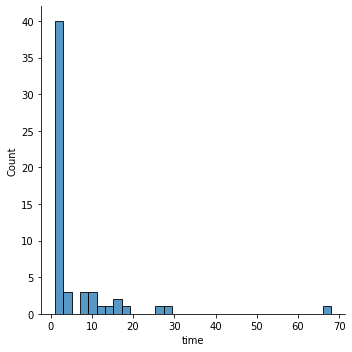

In [18]:
sns.displot(count_likes['time'])

As we see here, most of the likes are within the first 20 ticks. The vast majority of likes are made in a short period of time.

Next, we'll put the data into a bar chart sorted by account.

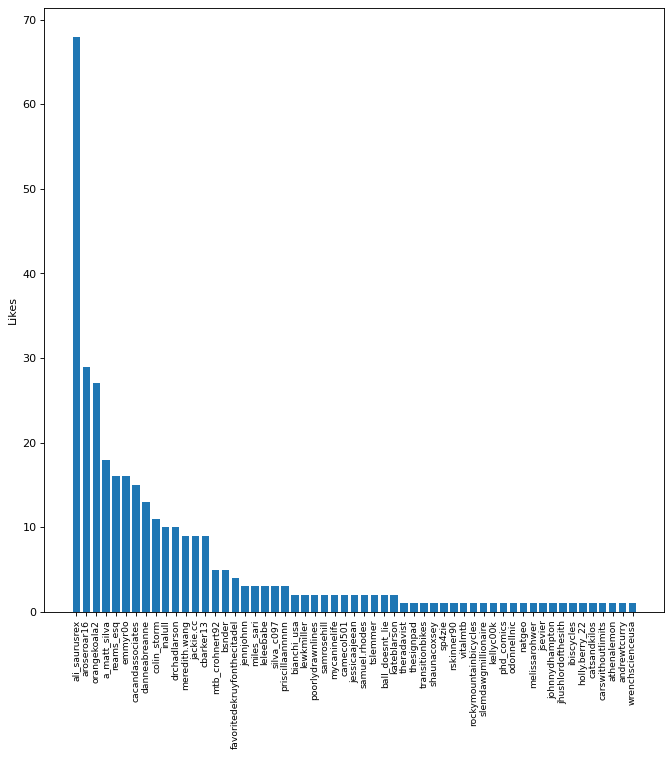

In [15]:
sortcount = count_likes.sort_values('time' ,ascending = False)
labels = sortcount['time'].keys()
vals = sortcount['time']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('Likes')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

As we can see here, the majority of likes are afforded to three accounts, with one having vastly more than the other two. It can be reasonably determined that Dr. Silva enjoyed the content of these accounts on a more frequent basis than that of other accounts.

Finally, we can put the data into a pie chart to show the distribution of the data in another way.

<function matplotlib.pyplot.show(close=None, block=None)>

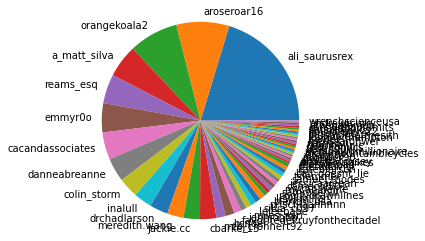

In [16]:
fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels)
ax2.axis('equal')
plt.show

Here we can see the dominance of the top three accounts in a different visual manner and more quickly, in my opinion.

In conclusion, we can see that the data is unevenly distributed and that Dr. Silva really likes content from ali_saurusrex, aroseroar16, and orangekoala2. 